


# Machine Learning

There are four sections below, corresponding to coding assignments. Implement and test.



# Decision Tree: Infogain



In [16]:
'''
Decision tree: Infogain

- implement the functions in this code for the infogain problem.

'''

import math
import numpy as np

#--------------------------
# my_log function: implement this and use it in entropy()
#--------------------------
def my_log(val):
  '''
  implement this
  '''
  if val==0:return 0 # values less than 0 should error
  # must take care of the val=0 case.
  # - right now it will cause an error when my_log(0) is called.
  return math.log2(val)


#--------------------------
# entropy function: implement this and use it in infogain()
#--------------------------
def entropy(pos_neg):
  '''
  implement this

  input:
  pos_neg is a list  [n, m], where
  n is the number of positive samples, and
  m is the number of negative samples

  returns:
  entropy value

  '''

  pos = pos_neg[0]
  neg = pos_neg[1]
  prob_pos = pos/(pos+neg)
  prob_neg = 1-prob_pos

  ent = -(prob_pos*my_log(prob_pos) + prob_neg*my_log(prob_neg))
  print(f'entropy = {pos_neg}')
  print(' prob_pos = '+str(prob_pos))
  print(f'entropy = {ent}')
  return ent
  

#--------------------------
# infogain function: define this and test
#--------------------------
def infogain (before, after):
  '''
  implement this

  input:
    before: [n, m], for pos# and neg#
    after: [[n1, m1], [n2, m2], [n3, m3], ... ],
      for pos# and neg# for the different splits.
    * example:
      before = [6,6]
      after  = [ [0,2], [4,0], [2,4] ]

  returns: infogain value
  '''
  ig = entropy(before) - sum([sum(x) * entropy(x) for x in after])/sum(before)
  print(f'infogain({before})')
  for i,a in enumerate(after):
    print(f'{a}',end='')
    if i<len(after)-1: print(f', ',end='')
  print()
  # 1. entropy before split
  # print(entropy(before))

  # 2. entropy after split
  # for split in after:
  #   #
  #   print(entropy(split))

  # 3. compute infogaion from 1 and 2 above
  # gain = ....

  # 4. return
  # return gain
  return ig
#--------------------------
# test entropy
#--------------------------
print(entropy([10,10]))
print('..')
print(entropy([2,5]))

#--------------------------
# test infogain
#--------------------------
pre = [6,6]
post  = [ [0,2], [4,0], [2,4] ]
print('\n\n')
print(infogain(pre, post))

entropy = [10, 10]
 prob_pos = 0.5
entropy = 1.0
1.0
..
entropy = [2, 5]
 prob_pos = 0.2857142857142857
entropy = 0.863120568566631
0.863120568566631



entropy = [6, 6]
 prob_pos = 0.5
entropy = 1.0
entropy = [0, 2]
 prob_pos = 0.0
entropy = -0.0
entropy = [4, 0]
 prob_pos = 1.0
entropy = -0.0
entropy = [2, 4]
 prob_pos = 0.3333333333333333
entropy = 0.9182958340544896
infogain([6, 6])
[0, 2], [4, 0], [2, 4]
0.5408520829727552


In [17]:
# Add your test code here, for the homework questions

infogain([6,6],[[0,2],[4,0],[2,4]])

entropy = [6, 6]
 prob_pos = 0.5
entropy = 1.0
entropy = [0, 2]
 prob_pos = 0.0
entropy = -0.0
entropy = [4, 0]
 prob_pos = 1.0
entropy = -0.0
entropy = [2, 4]
 prob_pos = 0.3333333333333333
entropy = 0.9182958340544896
infogain([6, 6])
[0, 2], [4, 0], [2, 4]


0.5408520829727552

# Decision Tree


[Text(0.6, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.5, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

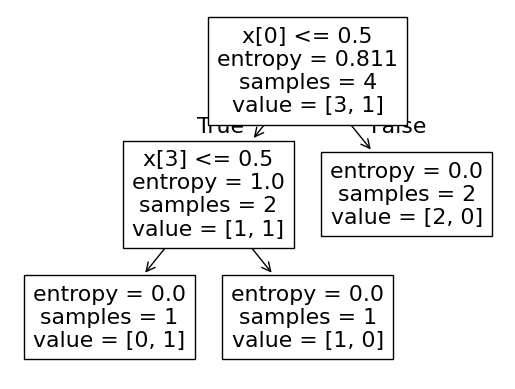

In [18]:
# Testing scikit-learn's decision tree implementation.
#
#  - scikit-learn's decision tree only allows binary target values.

from sklearn import tree
import numpy as np

clf = tree.DecisionTreeClassifier(criterion="entropy")

# Enter your data here. Each row is an instance. Each column is the attribute.
# Set the first attribute value that appears in the table to be 0, and the next one as 1.
# - for example, for the Commute attribute, 2hr = 0, and 1hr = 1.
#
# X = [[0,0,0,0],
#      [0,0,0,1],
#      ... .... ... ]
#

# mock data, with only 4 instances
# - MODIFY this
#
# Column order: Commute, JobType, Location, StockOption
# Values:
#    Commute:     2hr=0, 1hr=1
#    JobType:     researech=0, development=1
#    Location:    westcoast=0, eastcoast=1
#    StockOption: yes=1, no=0
# Target:         N=0, Y=1
X = [[0,0,0,0],
     [0,0,0,1],
     [1,0,0,0],
     [1,1,0,0] ]

# Enter the target data (AcceptJob) here. 1 = Yes. 0 = No.
# y = [1, 1, .... ]
# - MODIFY this

y = [ 1,
     0,
     0,
     0 ]
clf = clf.fit(X, y)

# Note: value=[a,b] means "a" negative samples, and "b" positive samples [# neg = a, # pos = b].
#       *Note that this order is reversed, compared to the lecture slides, where we had [# pos, #neg], so you have to be careful.
# Note: left branch is attribute value 0, right branch = attribute value 1.
# Note: X[n] means the attribute for the n-th column (n=0 is the first column in),
#       so, for the homework problem, X[0] is Commute. X[1] is JobType, etc.

tree.plot_tree(clf)

# Check if the tree gives the correct answer for the mock dataset above.


# Neural Networks: Perceptron



Target:[0 1 1 1]
number of epochs = 7
average error = 0.0
Testing plot_decision_boundary
[0.15293108 0.07357558 0.04743352]



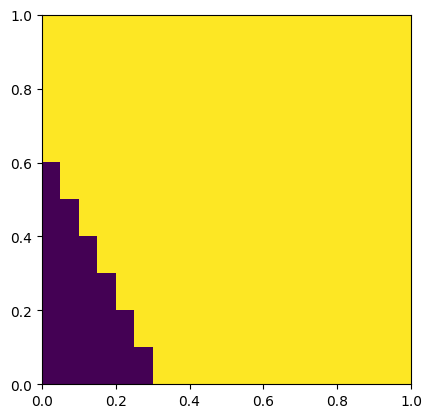

Target:[0 1 1 0]
number of epochs = 500
average error = 0.75
Testing plot_decision_boundary
[ 0.04382932 -0.00196621  0.09709293]



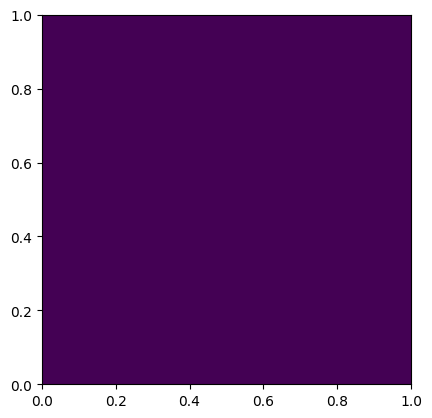

Target:[0 0 0 1]
number of epochs = 13
average error = 0.0
Testing plot_decision_boundary
[0.13987632 0.24415723 0.30422279]



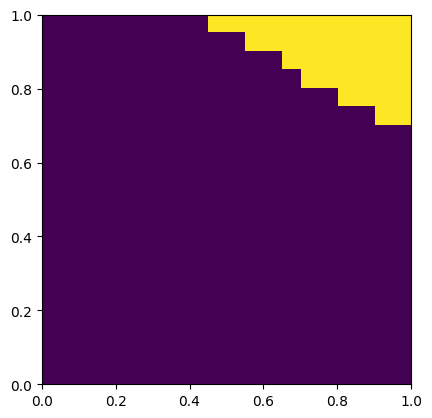

In [56]:
'''
Implement perceptron in this code cell : implement the perceptron() function

Assumptions: 2 input, 1 output perceptron.
  Note: 1 bias unit should also be added to the input vector  (fixed value of 1.0).
        This is already done in the skeleton code.
'''

import matplotlib.pyplot as plt
import random

# example data: OR
# -input  : [x,y] values
# -target : target values
'''
  implement this:
     add more samples, for OR, XOR, etc.
'''
input  = np.array(
          [[0,0],
          [0,1],
          [1,0],
          [1,1]])
or_out = np.array([
          0,
          1,
          1,
          1])
xor_out = np.array([
          0,
          1,
          1,
          0])
and_out = np.array([
          0,
          0,
          0,
          1])

BIAS = -1.0

#-----------------------------
# plot decision boundary function
#-----------------------------
def plot_decision_boundary(W):
  '''
  plot the decision boundary for weight vector W
  - fully functional
  '''

  x = np.arange(0.0, 1.0, 0.05)
  y = np.arange(1.0, 0.0, -0.05)

  xx, yy = np.meshgrid(x, y)

  output = W[0]*xx + W[1]*yy + W[2]*BIAS

  fig, ax = plt.subplots(1,1)

  ax.imshow(output>=0.0, extent=[0,1,0,1])
  plt.show()

#-----------------------------
# perceptron function: implement this
#-----------------------------
def perceptron(inp, tgt, alpha=0.01, err_target=0.001):
  '''
  implement this

  input:
    inp : input vector array
    tgt : target output array
    alpha : learning rate, default = 0.01
    err_target : target error below which to terminate

  output: print out #epochs, error, and plot the decision boundary

  returns: Weight vector
  '''
  print(f'Target:{tgt}')
  # compute some common sizes
  num_dat = len(tgt)
  inp_dim = len(inp[0])+1        # "+1" to add bias unit

  # add bias to input vectors
  inp = np.append(inp, BIAS*np.ones([num_dat,1]), axis=1)

  # initialize weight vector : -0.5 ~ 0.5
  W = (np.random.rand(inp_dim)-0.5)

  n = 0
  error = math.inf
  while error > err_target:

    #--------------
    # epoch
    #--------------

    # randomize input ordering
    order = np.arange(num_dat)
    np.random.shuffle(order)

    # 1. go over each input

    total_error = 0.0

    for i in order:

      # print("Input (with bias at the end)=", end='')
      # print(inp[i], end=', Target=')
      # print(tgt[i])
      # 1.1. activate output unit : don't forget to apply the step function!
      out = 1 if sum(inp[i]*W)>0 else 0
      # 1.2. compute error
      err = out-tgt[i]
      # 1.3. adjust weight, based on the error
      W = W - alpha * inp[i] * err
      # 1.4. keep sum of total_error during this epoch
      total_error = total_error + abs(err)

    # 2. compute error for the epoch as the mean error from the current epoch
    error = total_error / num_dat

    # increment epoch count
    n = n + 1
    if n==500:break
    # forcefully quit, for now. You must check for the termination condition.
    # error = 0.00001

  # Done with training
  print('number of epochs = '+str(n))
  print('average error = '+str(error))

  # return weight vector
  return W

#-----------------------------
# test perceptron
#-----------------------------
# targets = [or_out]
targets = [or_out,xor_out,and_out]
for target in targets:
  W = perceptron(input, target, 0.1, 0.001)

#-----------------------------
# test decision boundary plot: white = 1, black = 0
# - Note: if you get totally white of totally black, try
#     rerunnning (sometimes more than 10 times) to get a non-trivial result.
#-----------------------------
  print('Testing plot_decision_boundary')
  print(W)
  print()
  plot_decision_boundary(W)


Target:[0 1 1 1]
number of epochs = 7
average error = 0.0
Target:[1 1 1 0]
number of epochs = 8
average error = 0.0
Target:[0 1 1 0]
number of epochs = 8
average error = 0.0
OR
[0.16822516 0.17608033 0.28539259]



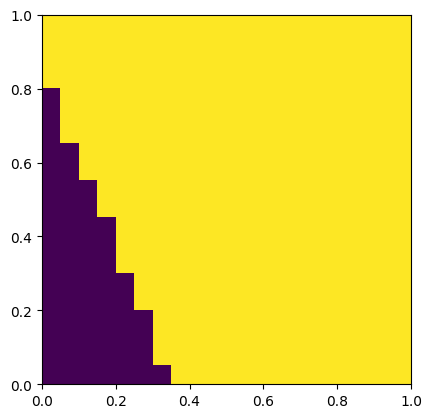

NAND
[0.16822516 0.17608033 0.28539259]



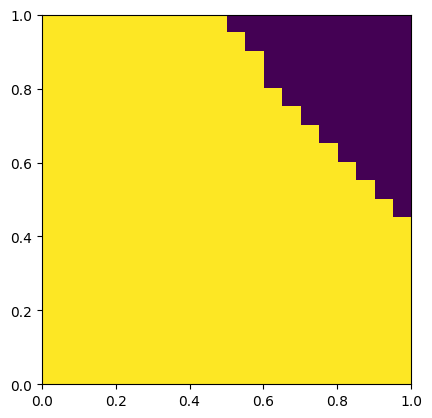

XOR = AND(OR,NAND)
[0.16822516 0.17608033 0.28539259]



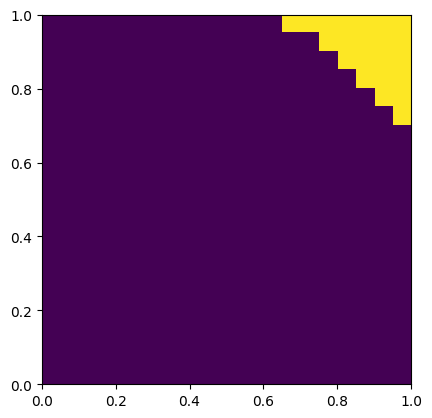

this means that the yellow area contains all the yellow area where the previous 2 boundaries are both yellow


In [99]:
# Add your test code here, for the homework questions
nand_out = np.array([
          1,
          1,
          1,
          0])
w_or = perceptron(input, or_out, 0.1, 0.001)
w_nand = perceptron(input, nand_out, 0.1, 0.001)

xor_out = np.array([
          0,
          1,
          1,
          0])
temp = np.append(input, BIAS*np.ones([4,1]), axis=1)
xinput = np.zeros([4,2])
for i,inp in enumerate(temp):
    xinput[i][0] = 1 if sum(inp*w_or)>0 else 0
    xinput[i][1] = 1 if sum(inp*w_nand)>0 else 0

# we could use our trained 'and' perceptron instead
w_xor = perceptron(xinput, xor_out, 0.1, 0.001)

print('OR')
print(w_xor)
print()
plot_decision_boundary(w_or)
print('NAND')
print(w_xor)
print()
plot_decision_boundary(w_nand)
print('XOR = AND(OR,NAND)')
print(w_xor)
print()
plot_decision_boundary(w_xor)
print('this means that the yellow area contains all the yellow area where the previous 2 boundaries are both yellow')

# Gradient Descent




W=4
E(4)=-81.0
E'(4)=-36.0
W=4.036
E(4.036)=-82.28514428409599
E'(4.036)=-35.39234534400002
W=4.071392345344
E(4.071392345344)=-83.52679521483252
E'(4.071392345344)=-34.768145321312815
W=4.106160490665313
E(4.106160490665313)=-84.72458048072481
E'(4.106160490665313)=-34.12881994733589
W=4.140289310612649
E(4.140289310612649)=-85.87828568442866
E'(4.140289310612649)=-33.47581387619098
W=4.173765124488839
E(4.173765124488839)=-86.98784991156123
E'(4.173765124488839)=-32.81058838229259
W=4.206575712871132
E(4.206575712871132)=-88.05336022487708
E'(4.206575712871132)=-32.13461340969184
W=4.238710326280824
E(4.238710326280824)=-89.07504518817683
E'(4.238710326280824)=-31.44935976791664
W=4.270159686048741
E(4.270159686048741)=-90.05326753365387
E'(4.270159686048741)=-30.756291548555623
W=4.300915977597296
E(4.300915977597296)=-90.98851609321338
E'(4.300915977597296)=-30.056858831291322
W=4.330972836428588
E(4.330972836428588)=-91.88139711861425
E'(4.330972836428588)=-29.35249074163714
W=4.3

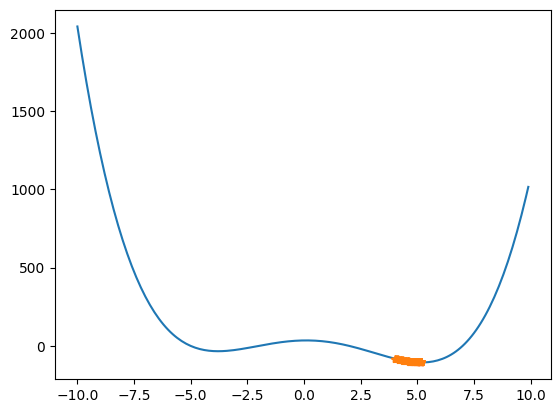

In [85]:
# Implement your program here:

# Example program. You can modity/extend this.
#
# 1. define function
# - this is an example (quadratic function) -- you should change it to the function given in problem 4)
# - also, you need to check for the termination condition, rather than using a fixed number of steps.
def E(w):
  '''
  implement this
  '''
  E = .25 * (np.power(w,4) - 2.0*np.power(w,3) - 39.0*np.power(w,2) + 8.0*w + 140.0) # note: np.power() can take scalar or vector as argument.
  print(f'E({w})={E}')
  return E

# 2. define derivative function
def dEdw(w):
  '''
  implement this
  '''
  E = np.power(w,3) - 1.5*np.power(w,2) - 19.5*w + 2
  print(f'E\'({w})={E}')
  return E

# 3. gradient descent
def gd(w=4,alpha=0.001,n=100):
  w_in = w
  w_t = np.zeros(n)   # this is w at step t
  Ew_t = np.zeros(n)  # this is E(w) at step t

  for i in range(n):
    '''
    implement this for-loop
    '''
    w_t[i]=w
    print(f'W={w}')
    Ew_t[i]=E(w)
    # implement this: gradient descent step
    w -= alpha * dEdw(w)

  # 4. plot E(w) and the gradient descent steps

  # Note: adjust the range below based on the function you're given in the problem.
  x = np.arange(-10,10,0.1)

  plt.plot(x,E(x),"-",w_t,Ew_t,"*-")
  print(f'Initial Pos:{w_in}, lr:{alpha}, steps:{n}')
  plt.show()
gd()

W=8
E(8)=195.0
E'(8)=262.0
W=7.7379999999999995
E(7.7379999999999995)=131.31910953968395
E'(7.7379999999999995)=224.61950527199994
W=7.513380494728
E(7.513380494728)=84.23776889386707
E'(7.513380494728)=194.9497398928086
W=7.318430754835191
E(7.318430754835191)=48.600047425587775
E'(7.318430754835191)=170.9224275176838
W=7.1475083273175075
E(7.1475083273175075)=21.093256013858955
E'(7.1475083273175075)=151.13714122898
W=6.996371186088528
E(6.996371186088528)=-0.4891889771456803
E'(6.996371186088528)=134.61378805230578
W=6.861757398036222
E(6.861757398036222)=-17.662171020892565
E'(6.861757398036222)=120.64718576559713
W=6.741110212270624
E(6.741110212270624)=-31.492761193708475
E'(6.741110212270624)=108.71785228054867
W=6.632392359990075
E(6.632392359990075)=-42.74940636451848
E'(6.632392359990075)=98.43524939330106
W=6.533957110596774
E(6.533957110596774)=-51.996258048121405
E'(6.533957110596774)=89.50053114679555
W=6.444456579449979
E(6.444456579449979)=-59.65454911574918
E'(6.444456

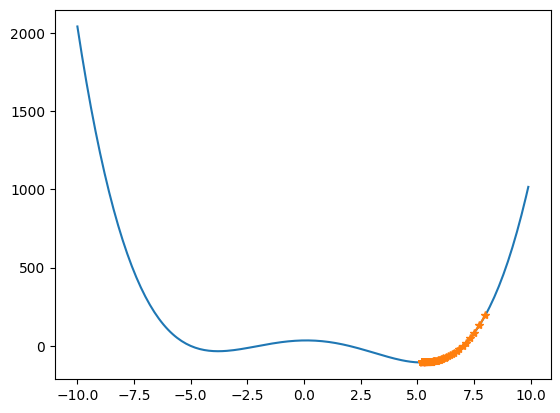

W=8
E(8)=195.0
E'(8)=262.0
W=6.6899999999999995
E(6.6899999999999995)=-36.92400769750009
E'(6.6899999999999995)=103.82915899999995
W=6.1708542049999995
E(6.1708542049999995)=-78.9132200885999
E'(6.1708542049999995)=59.53186301436851
W=5.873194889928157
E(5.873194889928157)=-93.40418621389742
E'(5.873194889928157)=38.3235131156257
W=5.6815773243500285
E(5.6815773243500285)=-99.5667644250243
E'(5.6815773243500285)=26.191900042281077
W=5.550617824138623
E(5.550617824138623)=-102.49135492998164
E'(5.550617824138623)=18.559888024570412
W=5.457818384015771
E(5.457818384015771)=-103.9754018977508
E'(5.457818384015771)=13.467170802495247
W=5.390482530003294
E(5.390482530003294)=-104.76246915548384
E'(5.390482530003294)=9.932516100313379
W=5.340819949501728
E(5.340819949501728)=-105.19283139128052
E'(5.340819949501728)=7.4109332123298515
W=5.303765283440079
E(5.303765283440079)=-105.43332591163175
E'(5.303765283440079)=5.576213609073548
W=5.275884215394711
E(5.275884215394711)=-105.569863857214

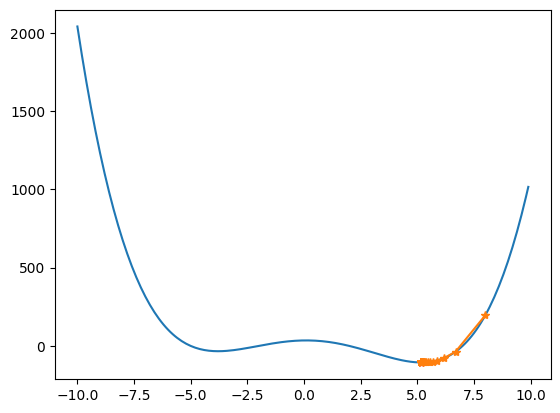

W=1
E(1)=27.0
E'(1)=-18.0
W=1.18
E(1.18)=23.447278439999998
E'(1.18)=-21.455568
W=1.3945556799999999
E(1.3945556799999999)=18.416944139777385
E'(1.3945556799999999)=-25.39890234929831
W=1.648544703492983
E(1.648544703492983)=11.405866082089773
E'(1.648544703492983)=-29.74292183099331
W=1.9459739218029162
E(1.9459739218029162)=1.8709763128117416
E'(1.9459739218029162)=-34.25767095951752
W=2.2885506313980915
E(2.2885506313980915)=-10.623516159148906
E'(2.2885506313980915)=-38.496731774073744
W=2.673517949138829
E(2.673517949138829)=-26.125374061585937
E'(2.673517949138829)=-41.745647846884175
W=3.0909744276076707
E(3.0909744276076707)=-43.916208182802066
E'(3.0909744276076707)=-43.073636106938864
W=3.5217107886770593
E(3.5217107886770593)=-62.264178836624
E'(3.5217107886770593)=-41.599199717763625
W=3.937702785854696
E(3.937702785854696)=-78.72612494825104
E'(3.937702785854696)=-36.98739590498005
W=4.307576744904496
E(4.307576744904496)=-91.18820448909483
E'(4.307576744904496)=-29.902549

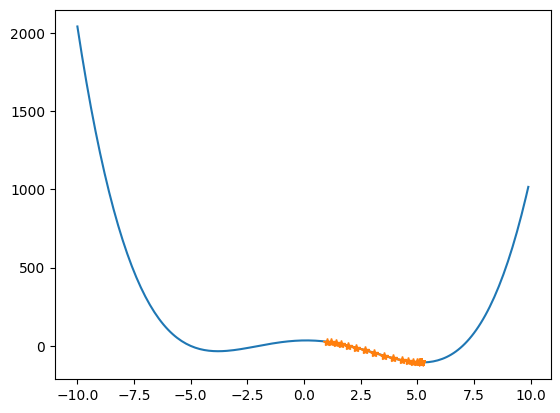

W=3
E(3)=-40.0
E'(3)=-43.0
W=3.43
E(3.43)=-58.421360497500004
E'(3.43)=-42.178743000000004
W=3.8517874300000003
E(3.8517874300000003)=-75.4943946060298
E'(3.8517874300000003)=-38.21811004345897
W=4.23396853043459
E(4.23396853043459)=-88.92567536633409
E'(4.23396853043459)=-31.55192814362257
W=4.549487811870816
E(4.549487811870816)=-97.68710352720399
E'(4.549487811870816)=-23.59720350049455
W=4.785459846875762
E(4.785459846875762)=-102.3955290665902
E'(4.785459846875762)=-16.07737999997535
W=4.946233646875515
E(4.946233646875515)=-104.51202739604119
E'(4.946233646875515)=-10.138666650597585
W=5.047620313381491
E(5.047620313381491)=-105.33455446555192
E'(5.047620313381491)=-6.040655447410515
W=5.108026867855596
E(5.108026867855596)=-105.6221944263713
E'(5.108026867855596)=-3.466108843042136
W=5.142687956286017
E(5.142687956286017)=-105.7160400227043
E'(5.142687956286017)=-1.943374650887563
W=5.1621217027948925
E(5.1621217027948925)=-105.74538609852627
E'(5.1621217027948925)=-1.0749833917

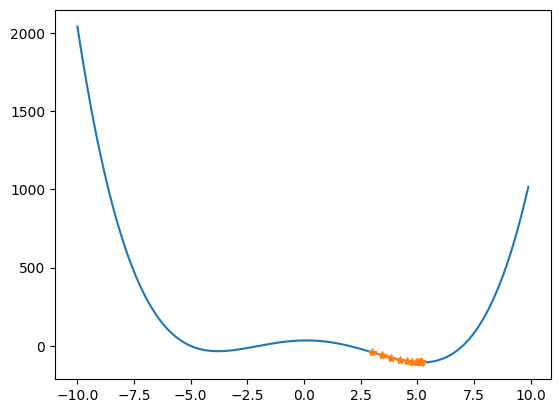

W=-6
E(-6)=104.0
E'(-6)=-151.0
W=-5.849
E(-5.849)=82.39090403990028
E'(-5.849)=-135.35967654900003
W=-5.713640323451
E(-5.713640323451)=64.97533601655883
E'(-5.713640323451)=-122.07824877506721
W=-5.591562074675933
E(-5.591562074675933)=50.77319199495386
E'(-5.591562074675933)=-110.68624471720148
W=-5.480875829958731
E(-5.480875829958731)=39.07140221204356
E'(-5.480875829958731)=-100.82843029435756
W=-5.380047399664374
E(-5.380047399664374)=29.341480484990292
E'(-5.380047399664374)=-92.2314286412966
W=-5.287815971023077
E(-5.287815971023077)=21.18529397810048
E'(-5.287815971023077)=-84.68169561348644
W=-5.203134275409591
E(-5.203134275409591)=14.29852579795617
E'(-5.203134275409591)=-78.01019676288678
W=-5.125124078646704
E(-5.125124078646704)=8.445527676656475
E'(-5.125124078646704)=-72.081531069998
W=-5.053042547576706
E(-5.053042547576706)=3.4416795662279256
E'(-5.053042547576706)=-66.78607178557567
W=-4.986256475791131
E(-4.986256475791131)=-0.8591981167658531
E'(-4.986256475791131

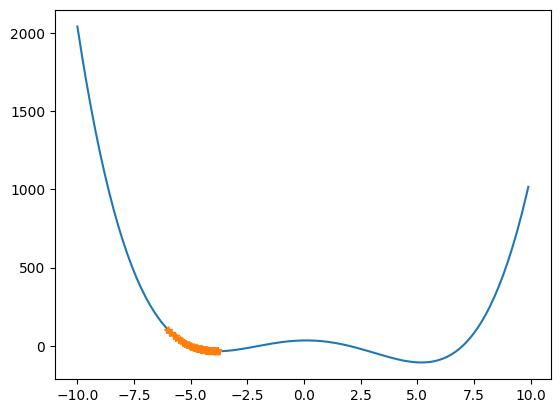

W=0
E(0)=35.0
E'(0)=2.0
W=-0.02
E(-0.02)=34.95610404
E'(-0.02)=2.389392
W=-0.04389392
E(-0.04389392)=34.89347027962966
E'(-0.04389392)=2.8529568563089924
W=-0.07242348856308993
E(-0.07242348856308993)=34.80420951072559
E'(-0.07242348856308993)=3.4040104115287053
W=-0.10646359267837699
E(-0.10646359267837699)=34.67719694644078
E'(-0.10646359267837699)=4.0578316011537545
W=-0.14704190868991454
E(-0.14704190868991454)=34.49681477493197
E'(-0.14704190868991454)=4.831705994497314
W=-0.1953589686348877
E(-0.1953589686348877)=34.24126417223622
E'(-0.1953589686348877)=5.744796298665687
W=-0.25280693162154455
E(-0.25280693162154455)=33.88035030663311
E'(-0.25280693162154455)=6.8177109186629465
W=-0.320984040808174
E(-0.320984040808174)=33.37267151049843
E'(-0.320984040808174)=8.071571436187064
W=-0.40169975517004464
E(-0.40169975517004464)=32.662233386843475
E'(-0.40169975517004464)=9.526281831466694
W=-0.49696257348471157
E(-0.49696257348471157)=31.674716446391514
E'(-0.49696257348471157)=11.1

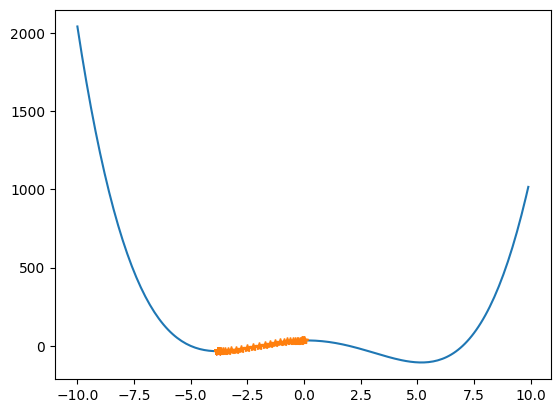

W=-8
E(-8)=675.0
E'(-8)=-450.0
W=1.0
E(1.0)=27.0
E'(1.0)=-18.0
W=1.3599999999999999
E(1.3599999999999999)=19.283927040000002
E'(1.3599999999999999)=-24.778943999999996
W=1.85557888
E(1.85557888)=4.909541717490413
E'(1.85557888)=-32.95946856816016
W=2.5147682513632033
E(2.5147682513632033)=-19.58338239401892
E'(2.5147682513632033)=-40.620526245282406
W=3.3271787762688514
E(3.3271787762688514)=-54.058549225694605
E'(3.3271787762688514)=-42.652900363635034
W=4.180236783541552
E(4.180236783541552)=-87.19976401440759
E'(4.180236783541552)=-32.679142395430254
W=4.833819631450157
E(4.833819631450157)=-103.13179561847758
E'(4.833819631450157)=-14.362079298149737
W=5.121061217413152
E(5.121061217413152)=-105.6636715887721
E'(5.121061217413152)=-2.8973928956733346
W=5.1790090753266185
E(5.1790090753266185)=-105.75710689962719
E'(5.1790090753266185)=-0.3117988757146861
W=5.185245052840912
E(5.185245052840912)=-105.75816681981627
E'(5.185245052840912)=-0.027956191172208378
W=5.185804176664356
E(5.

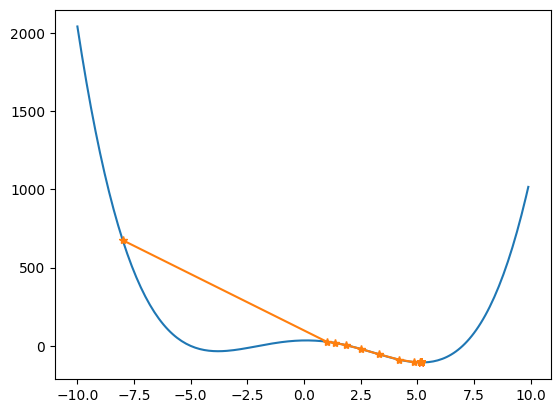

In [92]:
# try learning rates
gd(w=8,alpha=0.001)
gd(w=8,alpha=0.005)
# try initial values for global min
gd(w=1,alpha=0.01,n=50)
gd(w=3,alpha=0.01,n=50)
# try initial values for local min
gd(w=-6)
gd(w=0,alpha=0.01)

# try to get initial -8 to global
gd(w=-8,alpha=0.02)